<a href="https://colab.research.google.com/github/Pranav2612000/course.fast.ai/blob/main/lesson1/Laugh_Cry_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Preparing data

In [ ]:
!pip install duckduckgo_search
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images = 30):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [ ]:
# Verify some results
urls_happy = search_images("happy person potrait", 5)
urls_sad = search_images("sad person potrait", 5)
urls_happy

Searching for 'happy person potrait'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'sad person potrait'


(#5) ['https://www.sott.net/image/s18/363461/full/584e656bc461887c2e8b4598.jpg','https://pluspng.com/img-png/our-smileys-for-your-business-because-happy-people-inspire-change-1042.png','https://www.1designshop.com/wp-content/uploads/2015/12/1dsp-20151212-002.png','https://www.lovepanky.com/wp-content/uploads/2019/10/How-to-Be-a-Happier-Person.jpg','https://the-happy-manager.com/wp-content/uploads/bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg']

In [ ]:
# Download and store into seperate folders
from time import sleep
from fastai.vision.all import *

categories = 'laughing', 'crying'
path = Path('happy_or_sad')

for o in categories:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls = search_images(f"{o} people potrait"))
  sleep(10)
  download_images(dest, urls = search_images(f"{o} people photo"))
  sleep(10)
  download_images(dest, urls = search_images(f"{o} people face"))
  sleep(10)
  download_images(dest, urls = search_images(f"{o} people headshot"))
  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'laughing people potrait'
Searching for 'laughing people photo'
Searching for 'laughing people face'
Searching for 'laughing people headshot'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'crying people potrait'
Searching for 'crying people photo'
Searching for 'crying people face'
Searching for 'crying people headshot'


In [ ]:
!rm happy_or_sad/sad -rf

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

## Step 2: Training the models

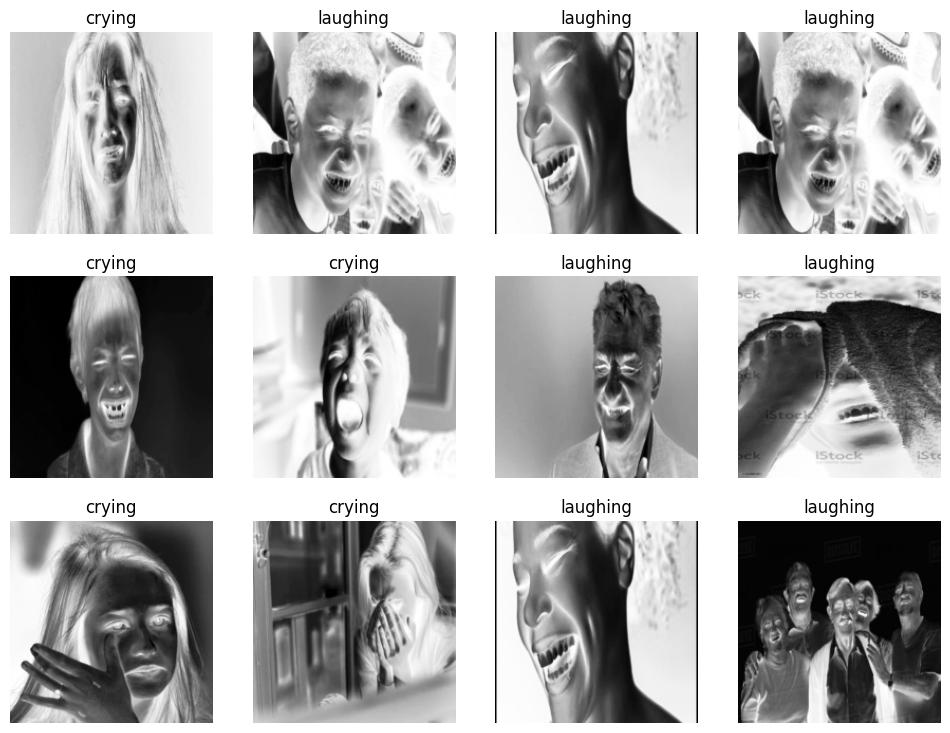

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n = 12)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.382597,1.068756,0.414634,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.538332,0.605646,0.292683,00:36
1,0.360211,0.333805,0.121951,00:36


## Use the model

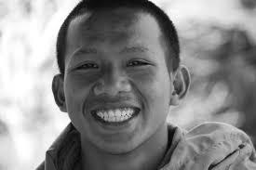

In [ ]:
from fastdownload import download_url

img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3IPCyGJbNRfANufNrWPaktVA2MGgM8FnoVA&usqp=CAU"
download_url(img_url, "image_hp_3.jpg", show_progress=False)
Image.open("image_hp_3.jpg").convert('L').save('image_hp_3_g.jpg')
Image.open("image_hp_3_g.jpg").to_thumb(256, 256)


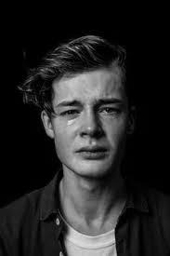

In [ ]:
from fastdownload import download_url

img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTockAlyGjWM2uYh0nLuxqaz2a0kCkON94NhQ&usqp=CAU"
download_url(img_url, "image_sd_2.jpg", show_progress=False)
Image.open("image_sd_2.jpg").convert('L').save('image_sd_2_g.jpg')
Image.open("image_sd_2_g.jpg").to_thumb(256, 256)

In [ ]:
is_happy, _, probs = learn.predict(PILImage.create('image_hp_3.jpg'))
print(f'The character is {is_happy}.')
print(f'Probability: {probs[0]:.4f}')

The character is crying.
Probability: 0.9918
